In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()


17464789/17464789 [==============================] - 6s 0us/step


In [3]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [21]:
import numpy as np
# Define your maximum vocabulary size
max_vocab_size = 10000

# Clip the indices in the input data to be within the valid range
X_train = np.clip(X_train, 0, max_vocab_size - 1)
X_test = np.clip(X_test, 0, max_vocab_size - 1)

In [22]:
X_train

array([[2071,   56,   26, ...,   19,  178,   32],
       [8255,    5, 9999, ...,   16,  145,   95],
       [ 215,   28,  610, ...,    7,  129,  113],
       ...,
       [   4,   65,  496, ...,    4, 3586, 9999],
       [  13,   18,   31, ...,   12,    9,   23],
       [7585,    8, 2197, ...,  204,  131,    9]])

In [23]:
X_train.shape

(25000, 50)

In [24]:
model = Sequential()
model.add(Embedding(input_dim = max_vocab_size, output_dim= 2))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 2)           177170    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 178,323
Trainable params: 178,323
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
782/782 [==============================] - 25s 28ms/step - loss: 0.6607 - acc: 0.5737 - val_loss: 0.4900 - val_acc: 0.7660
Epoch 2/10
782/782 [==============================] - 20s 25ms/step - loss: 0.4341 - acc: 0.7995 - val_loss: 0.4242 - val_acc: 0.8054
Epoch 3/10
782/782 [==============================] - 20s 25ms/step - loss: 0.3415 - acc: 0.8571 - val_loss: 0.4643 - val_acc: 0.8014
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.2967 - acc: 0.8819 - val_loss: 0.4436 - val_acc: 0.8038
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2645 - acc: 0.8978 - val_loss: 0.4854 - val_acc: 0.7995
Epoch 6/10
782/782 [==============================] - 28s 35ms/step - loss: 0.2394 - acc: 0.9107 - val_loss: 0.5026 - val_acc: 0.7960
Epoch 7/10
782/782 [==============================] - 28s 36ms/step - loss: 0.2185 - acc: 0.9199 - val_loss: 0.5619 - val_acc: 0.7884
Epoch 8/10
782/782 [==============================] - 25s 31ms

## Metrics for training Data

In [27]:
model.predict(X_train)

782/782 [==============================] - 5s 6ms/step


array([[0.931484  ],
       [0.02781909],
       [0.21464561],
       ...,
       [0.07176649],
       [0.98032457],
       [0.5493689 ]], dtype=float32)

In [28]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import auc,roc_auc_score,roc_curve,RocCurveDisplay
roc_auc_score(y_train , model.predict(X_train))

782/782 [==============================] - 5s 6ms/step


0.9888641568000001

In [45]:
import matplotlib.pyplot as plt
fpr_tpr = roc_curve(y_train , model.predict(X_train))
fpr_tpr_test = roc_curve(y_test , model.predict(X_test))


782/782 [==============================] - 5s 6ms/step


Text(0.5, 1.0, 'ROC Curve')

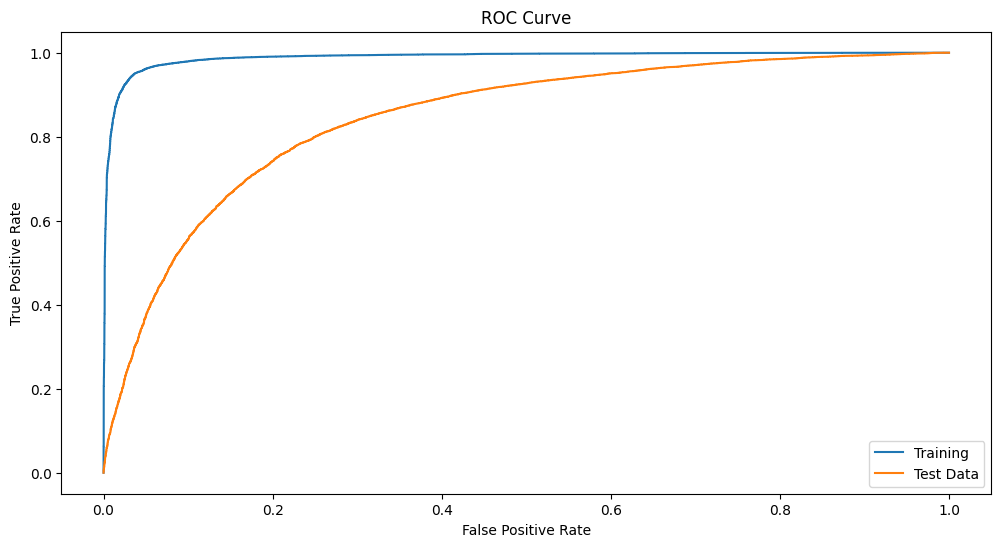

In [48]:
fig , ax = plt.subplots(figsize =(12,6))
RocCurveDisplay(fpr=fpr_tpr[0] , tpr = fpr_tpr[1]).plot(ax=ax ,label = "Training")
RocCurveDisplay(fpr=fpr_tpr_test[0] , tpr = fpr_tpr_test[1]).plot(ax=ax ,label ="Test Data")
plt.title("ROC Curve")

In [49]:
prediction_train = np.where(model.predict(X_train) >0.5,1 ,0)

782/782 [==============================] - 4s 6ms/step


In [50]:
prediction_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

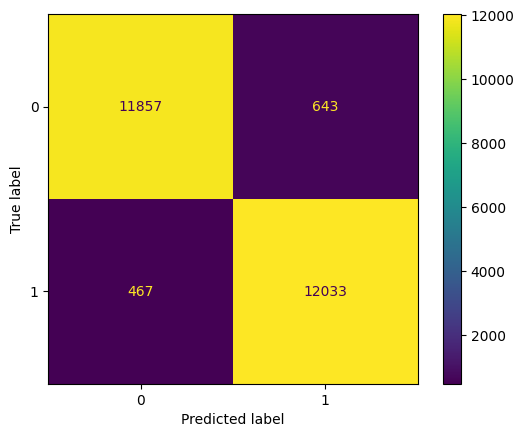

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix , classification_report , accuracy_score ,precision_recall_curve
ConfusionMatrixDisplay(confusion_matrix(y_train ,prediction_train) ).plot()

In [76]:
accuracy_score(y_train , prediction_train)

0.9556

In [59]:
p_r_train = precision_recall_curve(y_train , model.predict(X_train))

782/782 [==============================] - 5s 6ms/step


In [66]:
p_r_train[2].shape

(24822,)

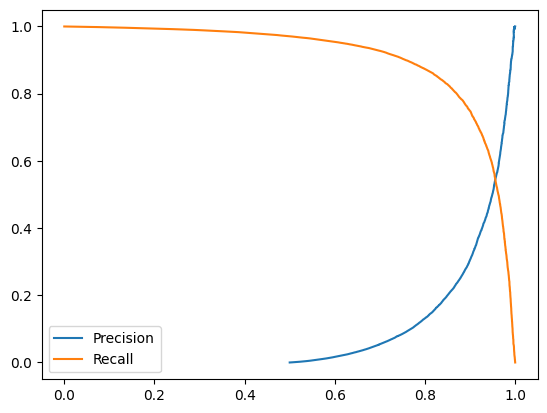

In [71]:
plt.plot(p_r_train[0][:-1], p_r_train[2] , label = "Precision")
plt.plot(p_r_train[1][:-1], p_r_train[2] ,label ="Recall")
plt.legend()

In [74]:
print(classification_report(y_train , prediction_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12500
           1       0.95      0.96      0.96     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



## Metrcis For testing Data

In [75]:
prediction_test = np.where(model.predict(X_test) >0.5,1 ,0)

782/782 [==============================] - 5s 7ms/step


In [78]:
roc_auc_score(y_test , model.predict(X_test))

782/782 [==============================] - 5s 6ms/step


0.8445067488

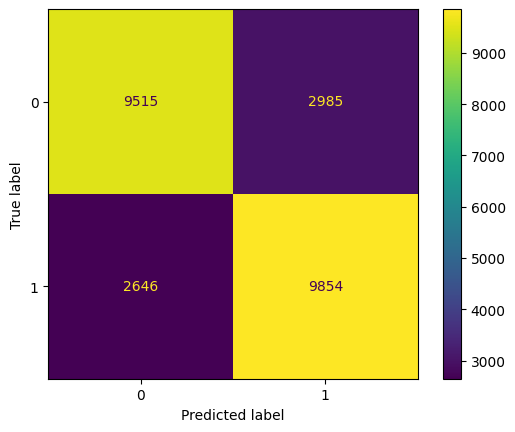

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test ,prediction_test) ).plot()

In [80]:
accuracy_score(y_test , prediction_test)

0.77476

In [81]:
p_r_test = precision_recall_curve(y_test , model.predict(X_test))

782/782 [==============================] - 5s 7ms/step


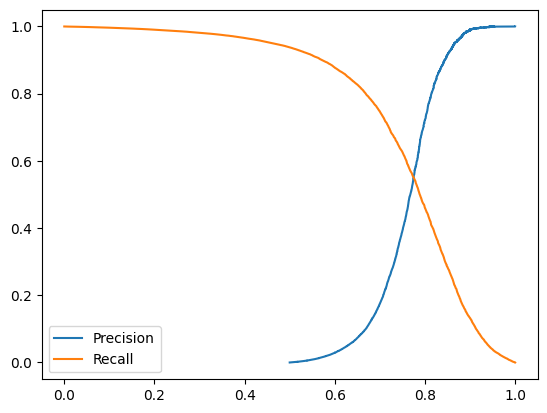

In [82]:
plt.plot(p_r_test[0][:-1], p_r_test[2] , label = "Precision")
plt.plot(p_r_test[1][:-1], p_r_test[2] ,label ="Recall")
plt.legend()